<h1> Chi$^2$ feature selection method</h1>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed_.xlsx", index_col=0)

In [54]:
df_preprocessed

,review,voted_up
9815,grać koło godzina skyrim special edition odnie...,False
6200,chodzić fabuła grafika gra zdać bardzo dobra p...,True
5302,myśleć gra bardzo godny polecenie świetnie spę...,True
4061,normalnie krewić człowiek zalewa nerwica pojaw...,False
36571,mocny raz chcieć rozpocząć przygoda jogging by...,False
...,...,...
36473,całkiem ładny grafika ciekawy postać lokacja z...,False
115,pierwsza gra typ mój ręka pozytywnie zaskoczyć...,True
38854,witać gierka naprawdę spoko problem połączyć s...,False
3537,niestety początek pojawienie gra nie być stan ...,True


In [55]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [56]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)

(2559, 116692)


In [57]:
X_test = vectorizer.transform(X_test)
tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)

(1098, 116692)


In [58]:
y = df_preprocessed['voted_up']
y

9815     False
6200      True
5302      True
4061     False
36571    False
         ...  
36473    False
115       True
38854    False
3537      True
28915    False
Name: voted_up, Length: 3657, dtype: bool

<h3> MultinomialNB </h3>

1000
6000
11000
16000
21000
26000
31000
36000
41000
46000
51000
56000
61000
66000
71000
76000
81000
86000
91000
96000
101000
106000
111000
116000
Best k is 6000 with score 0.8460837887067395
              precision    recall  f1-score   support

       False       0.83      0.88      0.85       553
        True       0.87      0.82      0.84       545

    accuracy                           0.85      1098
   macro avg       0.85      0.85      0.85      1098
weighted avg       0.85      0.85      0.85      1098

[[484  69]
 [100 445]]


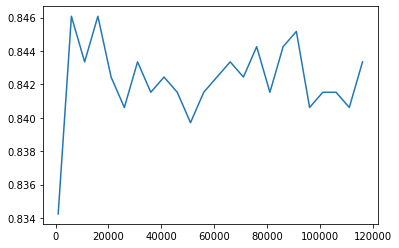

In [14]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X_train.shape[1], 5000)]
all_scores = []

for k in all_k:
    print(k)
    kbest = SelectKBest(score_func=chi2, k=k)

#     fit = kbest.fit(X, y)

    X_train_new=kbest.fit_transform(X_train, y_train)

#     model = GaussianNB(var_smoothing=0.0657933224657568)
    model = MultinomialNB()

#     X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
    X_test_new = kbest.transform(X_test)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)
#     print(k)
#     print(score)
#     print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
    
    if score > score_best:
        score_best = score
        k_best = k
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model = model
        best_features = kbest
        
print(f"Best k is {k_best} with score {score_best}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores)

<h3> SVC </h3>

In [ ]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X_train.shape[1], 5000)]
all_scores = []

for k in all_k:
    print(k)
    kbest = SelectKBest(score_func=chi2, k=k)

    X_train_new=kbest.fit_transform(X_train, y_train)

    model = SVC()

    X_test_new = kbest.transform(X_test)
    model.fit(X_train_new.toarray(),y_train)

    y_pred = model.predict(X_test_new.toarray())
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)
    
    if score > score_best:
        score_best = score
        k_best = k
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model = model
        best_features = kbest
        
print(f"Best k is {k_best} with score {score_best}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores)

<h3> KNeighborsClassifier </h3>

In [ ]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X.shape[1], 10000)]
all_scores = []
best_n = 0

for k in all_k:
    kbest = SelectKBest(score_func=chi2, k=k)
    X_train_new=kbest.fit_transform(X_train, y_train)
    
    for n in range(1,20):
        model = KNeighborsClassifier(n_neighbors=n)

        X_test_new = kbest.transform(X_test)
        model.fit(X_train_new.toarray(),y_train)

        y_pred = model.predict(X_test_new.toarray())
        score = accuracy_score(y_test,y_pred)
        all_scores.append(score)

        if score > score_best:
            score_best = score
            k_best = k
            best_n = n
            class_best = classification_report(y_test,y_pred)
            conf_best = confusion_matrix(y_test,y_pred)
        
print(f"Best k is {k_best} with score {score_best}")
print(f"Best n is {best_n}")
print(class_best)
print(conf_best)

<h3> DecisionTreeClassifier </h3>

1000
6000
11000
16000
21000
26000
31000
36000
41000
46000
51000
56000
61000
66000
71000
76000
81000
86000
91000
96000
101000
106000
111000
116000
Best k is 31000 with score 0.7349726775956285
              precision    recall  f1-score   support

       False       0.76      0.69      0.73       553
        True       0.71      0.78      0.74       545

    accuracy                           0.73      1098
   macro avg       0.74      0.74      0.73      1098
weighted avg       0.74      0.73      0.73      1098

[[384 169]
 [122 423]]


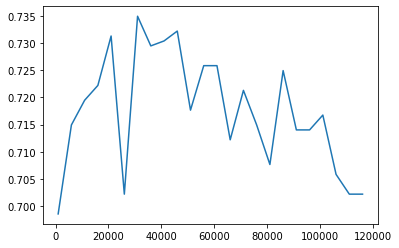

In [65]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X_train.shape[1], 5000)]
all_scores = []

for k in all_k:
    print(k)
    kbest = SelectKBest(score_func=chi2, k=k)

    X_train_new=kbest.fit_transform(X_train, y_train)

    model = DecisionTreeClassifier()

    X_test_new = kbest.transform(X_test)
    model.fit(X_train_new.toarray(),y_train)

    y_pred = model.predict(X_test_new.toarray())
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)
    
    if score > score_best:
        score_best = score
        k_best = k
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model = model
        best_features = kbest
        
print(f"Best k is {k_best} with score {score_best}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores)

<h3> GaussianNB </h3>

1000
6000
11000
16000
21000
26000
31000
36000
41000
46000
51000
56000
61000
66000
71000
76000
81000
86000
91000
96000
101000
106000
111000
116000
Best k is 26000 with score 0.7887067395264117
              precision    recall  f1-score   support

       False       0.77      0.83      0.80       553
        True       0.81      0.75      0.78       545

    accuracy                           0.79      1098
   macro avg       0.79      0.79      0.79      1098
weighted avg       0.79      0.79      0.79      1098

[[459  94]
 [138 407]]


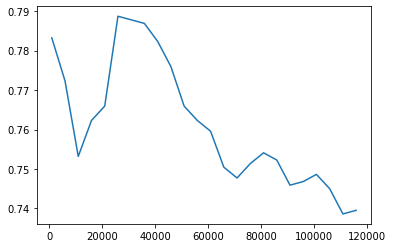

In [64]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X_train.shape[1], 5000)]
all_scores = []

for k in all_k:
    print(k)
    kbest = SelectKBest(score_func=chi2, k=k)

    X_train_new=kbest.fit_transform(X_train, y_train)

    model = GaussianNB()

    X_test_new = kbest.transform(X_test)
    model.fit(X_train_new.toarray(),y_train)

    y_pred = model.predict(X_test_new.toarray())
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)
    
    if score > score_best:
        score_best = score
        k_best = k
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model = model
        best_features = kbest
        
print(f"Best k is {k_best} with score {score_best}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores)

<h3> LogisticRegression </h3>

1000
6000
11000
16000
21000
26000
31000
36000
41000
46000
51000
56000
61000
66000
71000
76000
81000
86000
91000
96000
101000
106000
111000
116000
Best k is 61000 with score 0.855191256830601
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       553
        True       0.89      0.81      0.85       545

    accuracy                           0.86      1098
   macro avg       0.86      0.85      0.85      1098
weighted avg       0.86      0.86      0.85      1098

[[497  56]
 [103 442]]


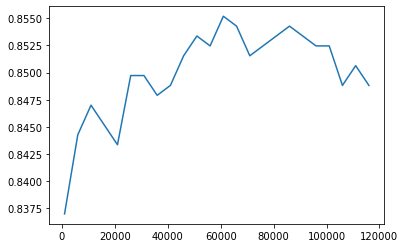

In [59]:
k_best = 0
score_best = 0
all_k = [i for i in range(1000, X_train.shape[1], 5000)]
all_scores = []

for k in all_k:
    print(k)
    kbest = SelectKBest(score_func=chi2, k=k)

    X_train_new=kbest.fit_transform(X_train, y_train)

    model = LogisticRegression()

    X_test_new = kbest.transform(X_test)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores.append(score)
    
    if score > score_best:
        score_best = score
        k_best = k
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model = model
        best_features = kbest
        
print(f"Best k is {k_best} with score {score_best}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores)